# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [57]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Lesson14.python/bank_clients_transactions.csv')

In [58]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю camelCase

In [59]:
# Исходные названия столбцов
original_columns = [
    'TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
    'CustLocation', 'CustAccountBalance', 'TransactionDate',
    'TransactionTime', 'TransactionAmount(INR)'
]

# Правильные названия в camelCase
corrected_columns = [
    'transactionId', 'customerId', 'customerDOB', 'custGender',
    'custLocation', 'custAccountBalance', 'transactionDate',
    'transactionTime', 'transactionAmountINR'
]

# Переименование столбцов
df.columns = corrected_columns


In [60]:
df.columns

Index(['transactionId', 'customerId', 'customerDOB', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionAmountINR'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transactionId         1048567 non-null  object 
 1   customerId            1048567 non-null  object 
 2   customerDOB           1045170 non-null  object 
 3   custGender            1047467 non-null  object 
 4   custLocation          1048416 non-null  object 
 5   custAccountBalance    1046198 non-null  float64
 6   transactionDate       1048567 non-null  object 
 7   transactionTime       1048567 non-null  int64  
 8   transactionAmountINR  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Приведение типов данных

**Привести дату к типу datetime**

In [62]:
from datetime import datetime

# 1. Преобразование дат с явным указанием формата
df['customerDOB'] = pd.to_datetime(df['customerDOB'], format='%d/%m/%y', errors='coerce')
df['transactionDate'] = pd.to_datetime(df['transactionDate'], format='%d/%m/%y', errors='coerce')

# 2. Исправление двухзначных годов (если %y использовался)
df['customerDOB'] = df['customerDOB'].mask(
df['customerDOB'].dt.year >= 2000,
df['customerDOB'] - pd.DateOffset(years=100)
)

# # # 3. Векторизованный расчет возраста
df['age'] = (df['transactionDate'].dt.year - df['customerDOB'].dt.year) - (
(df['transactionDate'].dt.month < df['customerDOB'].dt.month) |
((df['transactionDate'].dt.month == df['customerDOB'].dt.month) &
(df['transactionDate'].dt.day < df['customerDOB'].dt.day))
).astype(int)

# # 4. Валидация возраста (теперь включая удаление age=0)
df = df[(df['age'] >= 0) & (df['age'] <= 100)] # Оставляем строки, где возраст от 0 до 100 включительно

# 5. Проверка результатов
print("Минимальный возраст:", df['age'].min())
print("Максимальный возраст:", df['age'].max())
print("Количество записей с age=0:", (df['age'] == 0).sum()) # Должно быть 0

Минимальный возраст: 16.0
Максимальный возраст: 100.0
Количество записей с age=0: 0


In [63]:
df

,transactionId,customerId,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionAmountINR,age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0


In [64]:
df.columns

Index(['transactionId', 'customerId', 'customerDOB', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionAmountINR', 'age'],
      dtype='object')

# Поиск дублей и пропусков в данных

In [65]:
# Сначала создадим копию DataFrame
df = df.copy()

# 2. Поиск и обработка пропусков и дублей
print("Пропуски в данных:")
print(df.isnull().sum())

# Удаляем строки с пропусками
df.dropna(inplace=True)

# Удаляем дубликаты
df.drop_duplicates(inplace=True)

# Проверяем результат
print("Пропуски после очистки:")
print(df.isnull().sum())



Пропуски в данных:
transactionId              0
customerId                 0
customerDOB                0
custGender               151
custLocation             151
custAccountBalance      2147
transactionDate            0
transactionTime            0
transactionAmountINR       0
age                        0
dtype: int64
Пропуски после очистки:
transactionId           0
customerId              0
customerDOB             0
custGender              0
custLocation            0
custAccountBalance      0
transactionDate         0
transactionTime         0
transactionAmountINR    0
age                     0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984437 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactionId         984437 non-null  object        
 1   customerId            984437 non-null  object        
 2   customerDOB           984437 non-null  datetime64[ns]
 3   custGender            984437 non-null  object        
 4   custLocation          984437 non-null  object        
 5   custAccountBalance    984437 non-null  float64       
 6   transactionDate       984437 non-null  datetime64[ns]
 7   transactionTime       984437 non-null  int64         
 8   transactionAmountINR  984437 non-null  float64       
 9   age                   984437 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 82.6+ MB


# Исследовательский анализ данных

In [68]:
df

,transactionId,customerId,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionAmountINR,age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0


# Количество уникальных клиентов.


In [69]:
unique_customers = df['customerId'].nunique()
print(f"Уникальных клиентов: {unique_customers}")

Уникальных клиентов: 838459


# Общее количество транзакций.

In [70]:
total_transactions = len(df)
print(f"Всего транзакций: {total_transactions}")

Всего транзакций: 984437


#Среднее количество транзакций на одного клиента.

In [71]:
avg_transactions_per_customer = total_transactions / unique_customers
print(f"Среднее количество транзакций на клиента: {avg_transactions_per_customer:.2f}")

Среднее количество транзакций на клиента: 1.17


#Распределение и размах величин CustAccountBalance и TransactionAmount.


# Рассчет корреляции

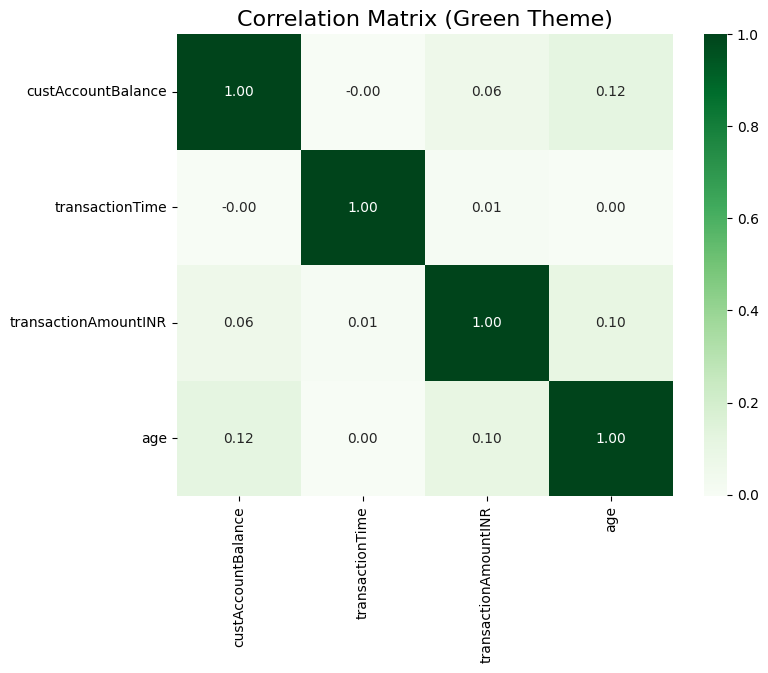

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитываем корреляцию
correlation_matrix = df[['custAccountBalance', 'transactionTime', 'transactionAmountINR', 'age']].corr()

# Строим тепловую карту с зелёной цветовой палитрой
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", cbar=True)

# Добавляем заголовок
plt.title("Correlation Matrix (Green Theme)", fontsize=16)
plt.show()


**Описательная статистика**


In [73]:
# Основные статистики для CustAccountBalance
print("Описательная статистика для custAccountBalance:")
print(df['custAccountBalance'].describe())

# Основные статистики для TransactionAmount
print("\nОписательная статистика для transactionAmountINR:")
print(df['transactionAmountINR'].describe())

Описательная статистика для custAccountBalance:
count    9.844370e+05
mean     1.061175e+05
std      8.182639e+05
min      0.000000e+00
25%      4.586520e+03
50%      1.601141e+04
75%      5.378011e+04
max      1.150355e+08
Name: custAccountBalance, dtype: float64

Описательная статистика для transactionAmountINR:
count    9.844370e+05
mean     1.452095e+03
std      6.141184e+03
min      0.000000e+00
25%      1.510000e+02
50%      4.310000e+02
75%      1.125000e+03
max      1.560035e+06
Name: transactionAmountINR, dtype: float64


In [74]:
import numpy as np

# Логарифмическое преобразование (добавляем 1, чтобы избежать log(0))
df['custAccountBalanceLog'] = np.log1p(df['custAccountBalance'])
df['transactionAmountINRLog'] = np.log1p(df['transactionAmountINR'])


In [75]:
df

,transactionId,customerId,customerDOB,custGender,custLocation,custAccountBalance,transactionDate,transactionTime,transactionAmountINR,age,custAccountBalanceLog,transactionAmountINRLog
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22.0,9.788080,3.258097
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59.0,7.728279,10.239960
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19.0,9.791183,6.131226
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42.0,13.672222,7.630947
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28.0,8.812163,7.475056
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26.0,8.940654,6.684612
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24.0,10.215097,6.133398
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27.0,12.309342,6.647688
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38.0,9.222157,6.908755


In [76]:
df.columns

Index(['transactionId', 'customerId', 'customerDOB', 'custGender',
       'custLocation', 'custAccountBalance', 'transactionDate',
       'transactionTime', 'transactionAmountINR', 'age',
       'custAccountBalanceLog', 'transactionAmountINRLog'],
      dtype='object')

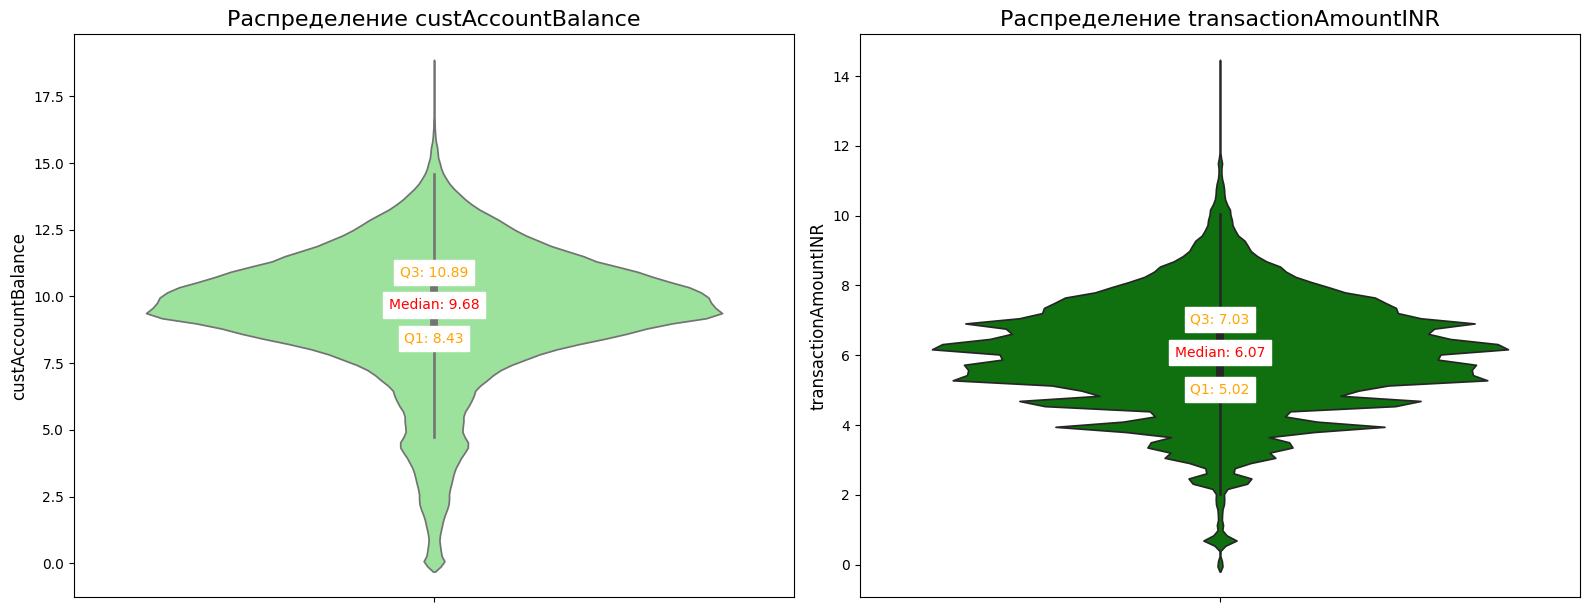

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
np.random.seed(42)
# Функция для добавления аннотаций на графиках
def add_statistics_annotations(ax, data, orientation='vertical'):
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    if orientation == 'vertical':
        # Подписи на графике
        ax.text(x=0, y=median, s=f"Median: {median:.2f}", color='red', fontsize=10, ha='center', va='center', backgroundcolor='white')
        ax.text(x=0, y=q1, s=f"Q1: {q1:.2f}", color='orange', fontsize=10, ha='center', va='center', backgroundcolor='white')
        ax.text(x=0, y=q3, s=f"Q3: {q3:.2f}", color='orange', fontsize=10, ha='center', va='center', backgroundcolor='white')
    elif orientation == 'horizontal':
        # Подписи на графике
        ax.text(x=median, y=0, s=f"Median: {median:.2f}", color='red', fontsize=10, ha='center', va='center', backgroundcolor='white')
        ax.text(x=q1, y=0, s=f"Q1: {q1:.2f}", color='orange', fontsize=10, ha='center', va='center', backgroundcolor='white')
        ax.text(x=q3, y=0, s=f"Q3: {q3:.2f}", color='orange', fontsize=10, ha='center', va='center', backgroundcolor='white')

# Увеличим размер графиков для лучшей читаемости
plt.figure(figsize=(16, 12))

# График в виде "скрипичного ключа" (violin plot) для custAccountBalance
plt.subplot(2, 2, 1)
ax1 = sns.violinplot(y=df['custAccountBalanceLog'], color='lightgreen')
add_statistics_annotations(ax1, df['custAccountBalanceLog'], orientation='vertical')
plt.title('Распределение custAccountBalance', fontsize=16)
plt.ylabel('custAccountBalance', fontsize=12)

# График в виде "скрипичного ключа" (violin plot) для transactionAmount
plt.subplot(2, 2, 2)
ax2 = sns.violinplot(y=df['transactionAmountINRLog'], color='green')
add_statistics_annotations(ax2, df['transactionAmountINRLog'], orientation='vertical')
plt.title('Распределение transactionAmountINR', fontsize=16)
plt.ylabel('transactionAmountINR', fontsize=12)

# Улучшим читаемость
plt.tight_layout()
plt.show()

#Возраст клиентов (визуализация).

In [78]:
# Вывод минимального значения в столбце age
min_age = df['age'].min()

# Вывод максимального значения в столбце age
max_age = df['age'].max()

# Печать результатов
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")


Минимальный возраст: 16.0
Максимальный возраст: 100.0


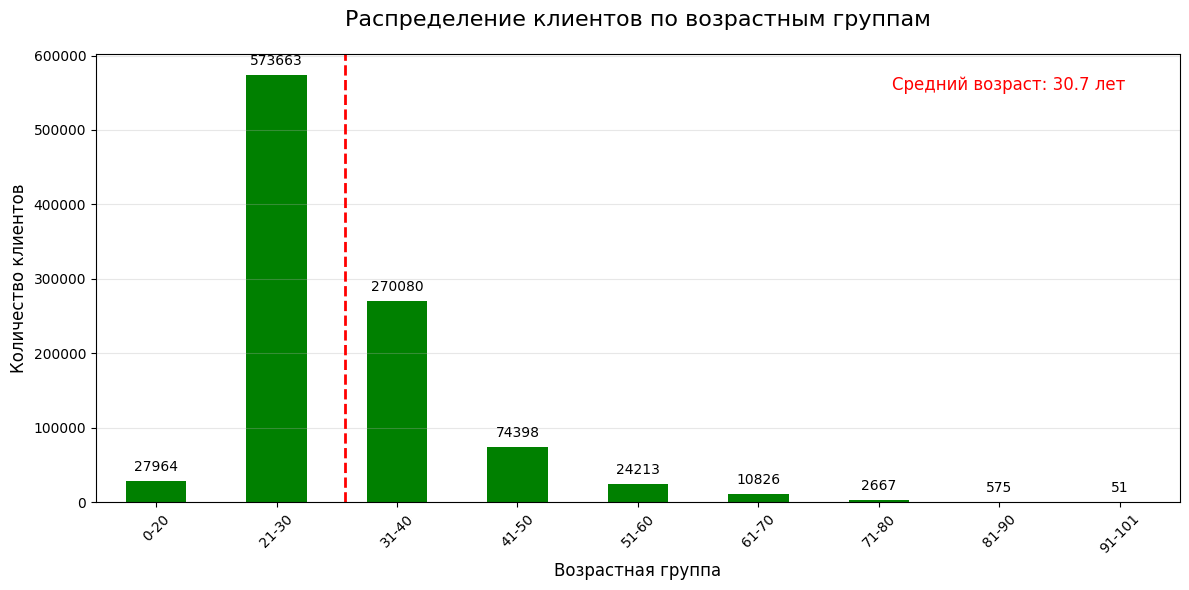

In [79]:
# Создаем возрастные группы
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 102]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-101']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Вычисляем средний возраст
mean_age = df['age'].mean()

# Строим график
plt.figure(figsize=(12, 6))
age_counts = df['age_group'].value_counts().sort_index()

ax = age_counts.plot(kind='bar', color='green')
plt.title('Распределение клиентов по возрастным группам', fontsize=16, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Добавляем вертикальную пунктирную линию среднего возраста
# Находим позицию возрастной группы, в которую попадает средний возраст
mean_age_group = pd.cut([mean_age], bins=bins, labels=labels)[0]
group_position = labels.index(mean_age_group) + (mean_age - bins[labels.index(mean_age_group)]) / (bins[labels.index(mean_age_group)+1] - bins[labels.index(mean_age_group)])

plt.axvline(x=group_position - 0.5, color='red', linestyle='--', linewidth=2)

# Добавляем надпись о среднем возрасте в правый верхний угол
plt.text(x=0.95, y=0.95,
         s=f'Средний возраст: {mean_age:.1f} лет',
         color='red', fontsize=12,
         ha='right', va='top',
         transform=ax.transAxes)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Пол клиентов (визуализация).

In [81]:
print(df['custGender'].value_counts())

custGender
M    711835
F    272602
Name: count, dtype: int64


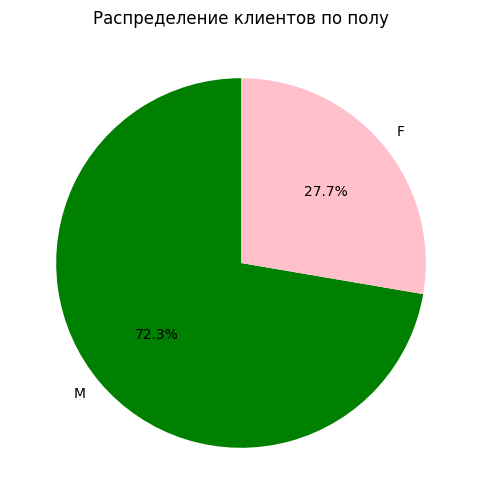

In [82]:
gender_distribution = df['custGender'].value_counts()

plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'pink'])
plt.title('Распределение клиентов по полу')
plt.ylabel('')
plt.show()


#Место жительства клиентов (визуализация).

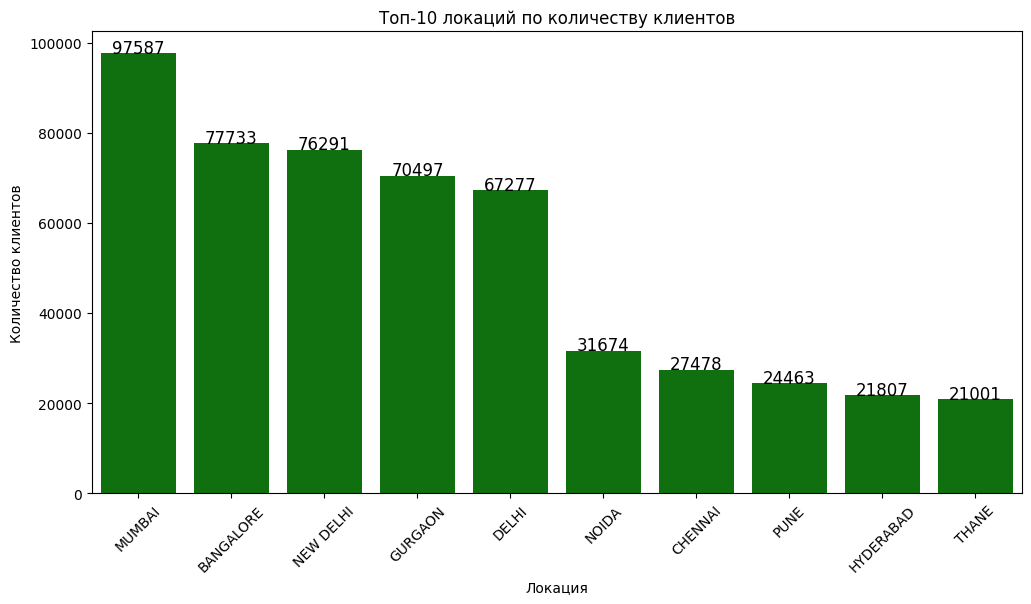

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Читаем данные

# Подсчет количества клиентов по локациям
location_count = df['custLocation'].value_counts()[:10]

# Создаем график
plt.figure(figsize=(12, 6))
sns.barplot(x=location_count.index, y=location_count.values, color='green')

# Добавляем значения на столбцах
for i, v in enumerate(location_count.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.title('Топ-10 локаций по количеству клиентов')
plt.xticks(rotation=45)
plt.xlabel('Локация')
plt.ylabel('Количество клиентов')
plt.show()


#Динамика транзакций по дате (в кол-ве TransactionID).

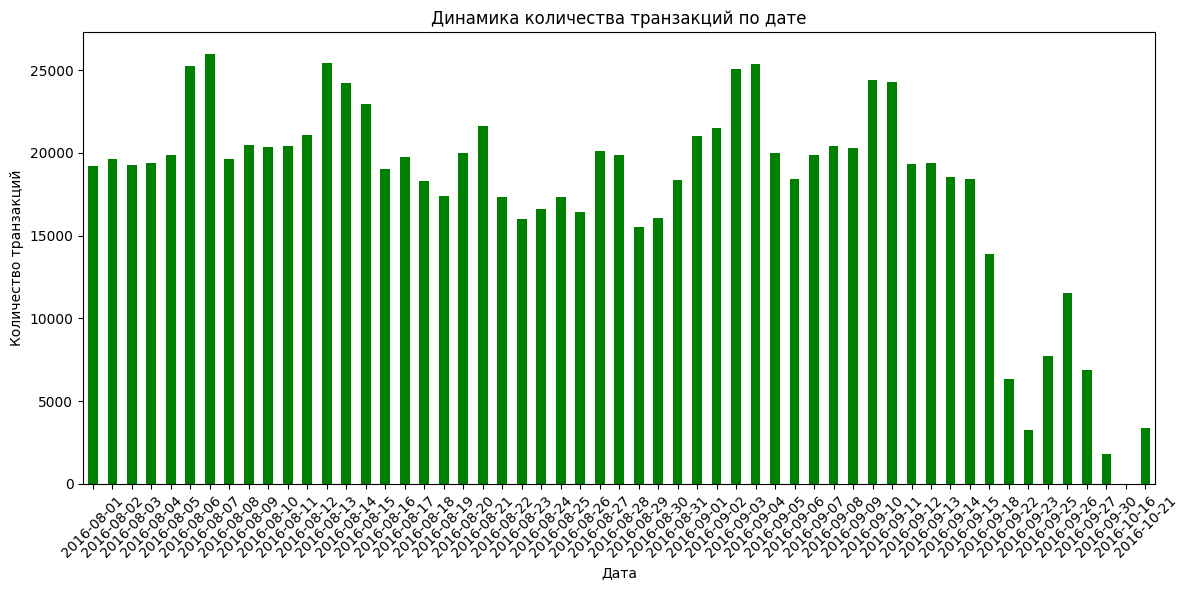

In [84]:
import matplotlib.pyplot as plt

transactions_by_date = df.groupby(df['transactionDate'].dt.date)['transactionId'].count()

plt.figure(figsize=(12, 6))
transactions_by_date.plot(kind='bar', color='green')  # Используем тип графика "bar"
plt.title('Динамика количества транзакций по дате')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для лучшей читаемости
plt.tight_layout()  # Делаем график более компактным
plt.show()


#Динамика транзакций по дате (в сумме TransactionAmount)

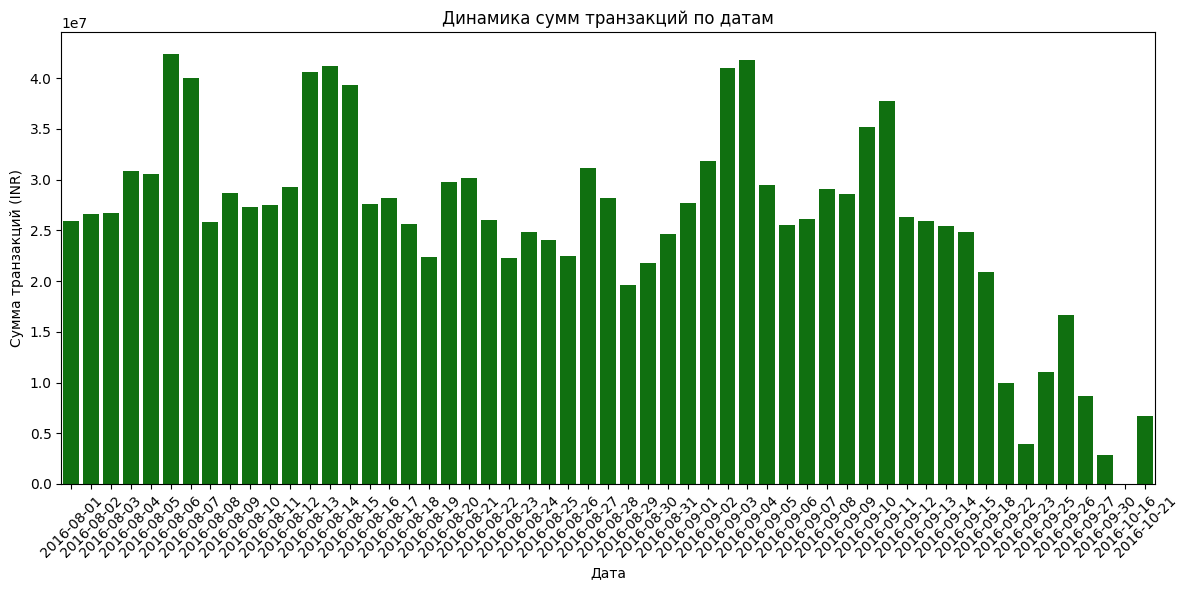

In [85]:
# Группируем данные и суммируем по дням
amount_per_day = df.groupby('transactionDate')['transactionAmountINR'].sum()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=amount_per_day.index, y=amount_per_day.values, color='green')
plt.title('Динамика сумм транзакций по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)  # Поворот меток по оси X для читаемости
plt.tight_layout()  # Компактное расположение элементов графика
plt.show()


#Разбивка клиентов на корзины по возрасту и определение самой платежеспособной группы

In [86]:
# Разбивка возрастов на корзины
age_bins = [0, 35, 55, 65, 75, 85, 102]
age_labels = ['0-35', '36-54', '55-64', '65-74', '75-84', '85-101']

# Создание новой колонки с возрастными группами
df['ageGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Вывод результата
print(df)


        transactionId customerId customerDOB custGender   custLocation  \
0                  T1   C5841053  1994-01-10          F     JAMSHEDPUR   
1                  T2   C2142763  1957-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-04-08          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-03-05          M           PUNE   

         custAccountBalance transactionDate  transactionTime  \
0                  17819.05      2016-08-02    

In [87]:
ageGroup_counts = df['ageGroup'].value_counts()
print(ageGroup_counts)

ageGroup
0-35      750941
36-54     208150
55-64      17536
65-74       6015
75-84       1495
85-101       300
Name: count, dtype: int64


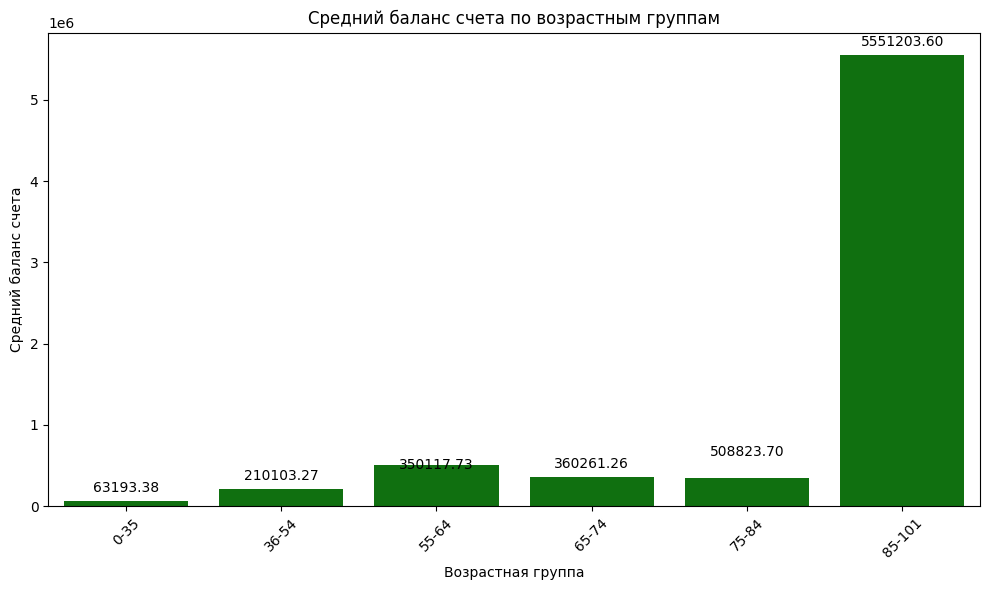

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Рассчитаем средний баланс счета для каждой возрастной группы и отсортируем по возрастанию
ageGroup_balance = df.groupby('ageGroup', observed=False)['custAccountBalance'].mean().sort_values(ascending=True)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=ageGroup_balance.index, y=ageGroup_balance.values, color='green')  # Указываем зелёный цвет

# Добавление подписей значений на каждом столбце
for i, value in enumerate(ageGroup_balance.values):
    plt.text(i, value + 0.02 * max(ageGroup_balance.values), f'{value:.2f}', ha='center', fontsize=10)

# Настройка графика
plt.title('Средний баланс счета по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний баланс счета')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:
ageGroup_balance

,custAccountBalance
ageGroup,
0-35,6.319338e+04
36-54,2.101033e+05
75-84,3.501177e+05
65-74,3.602613e+05
55-64,5.088237e+05
85-101,5.551204e+06


#Распредление транзакций по локации - топ 10 по кол-ву транзакций/сумме транзакций.

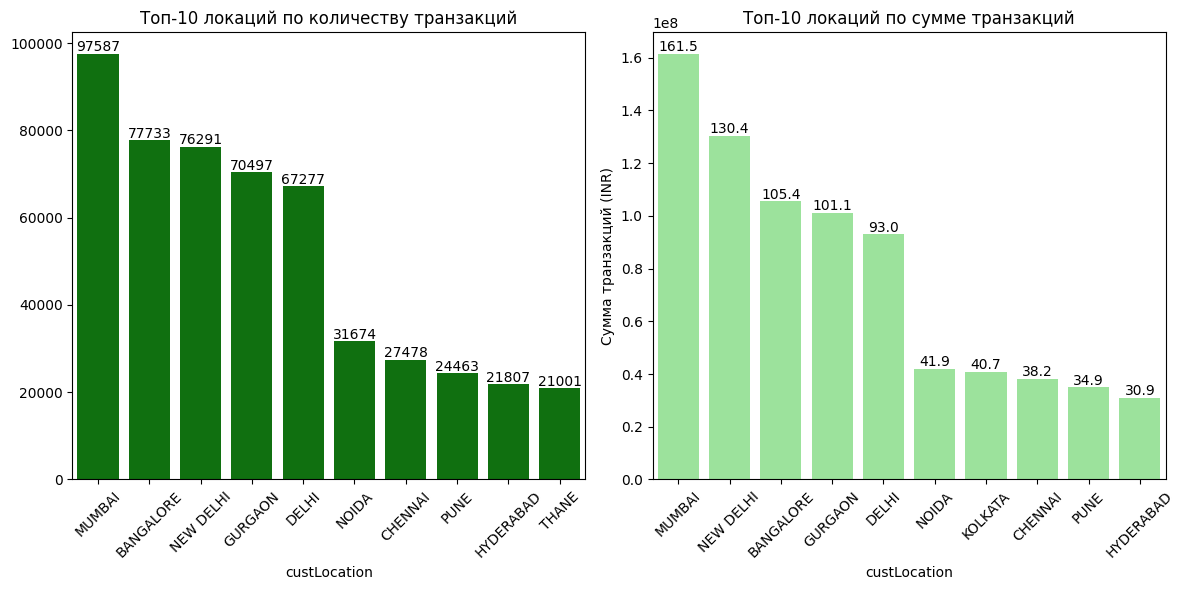

In [90]:
# 13. Распределение по локации (топ-10)
top_locations_count = df.groupby('custLocation').size().nlargest(10)
top_locations_amount = df.groupby('custLocation')['transactionAmountINR'].sum().nlargest(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_locations_count.index, y=top_locations_count.values, color='green')
plt.title('Топ-10 локаций по количеству транзакций')
plt.xticks(rotation=45)

# Добавляем значения над столбцами для первого графика с уменьшенным шрифтом
for i, v in enumerate(top_locations_count.values):
    plt.text(i, v + 500, str(v), ha='center', fontsize=10)  # Уменьшили fontsize до 10

plt.subplot(1, 2, 2)
sns.barplot(x=top_locations_amount.index, y=top_locations_amount.values, color='lightgreen')
plt.title('Топ-10 локаций по сумме транзакций')
plt.xticks(rotation=45)
plt.ylabel('Сумма транзакций (INR)')

# Добавляем значения над столбцами для второго графика с уменьшенным шрифтом
for i, v in enumerate(top_locations_amount.values):
    plt.text(i, v + 1e6, f"{v/1e6:.1f}", ha='center', fontsize=10)  # Уменьшили fontsize до 10

plt.tight_layout()
plt.show()


#Распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты.

Минимальное время транзакции: 0.00 минут
Максимальное время транзакции: 3.93 минут
Среднее время транзакции: 2.62 минут


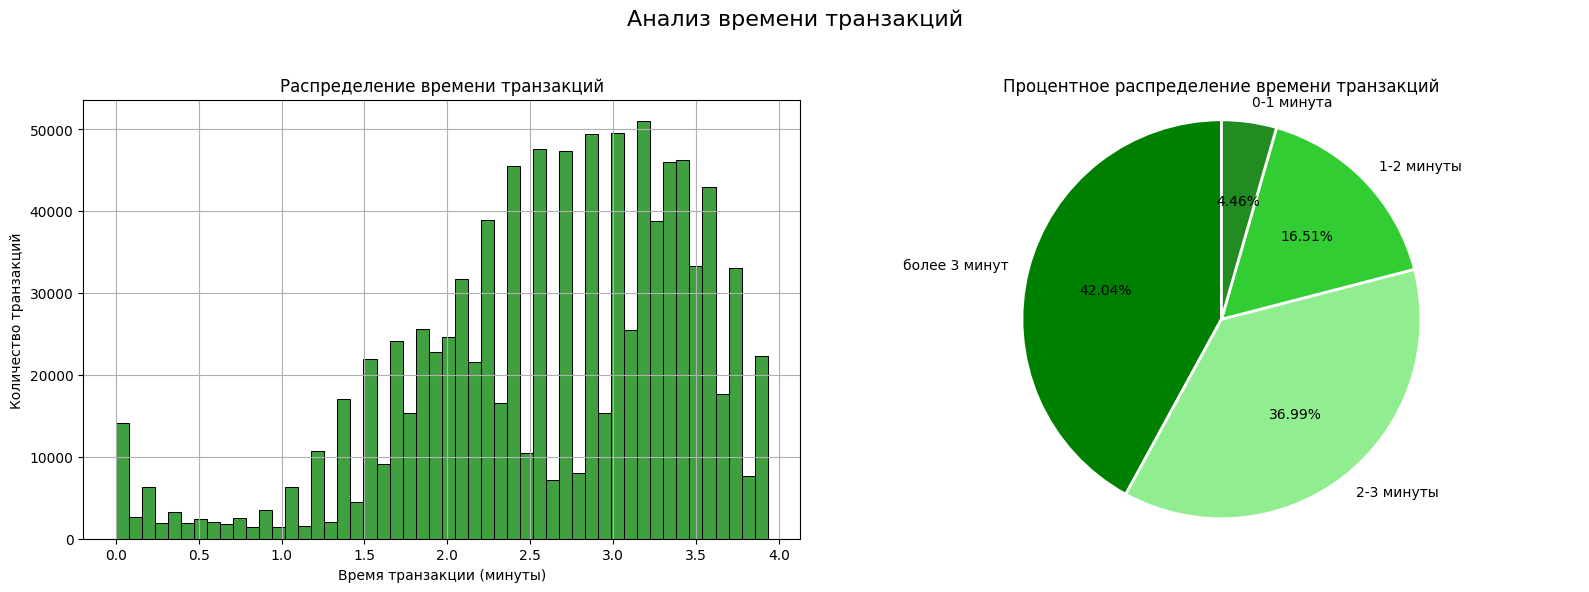

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем время из миллисекунд в минуты
df['TransactionTimeMinutes'] = df['transactionTime'] / (1000 * 60)

# Статистика по времени транзакций
min_time = df['TransactionTimeMinutes'].min()
max_time = df['TransactionTimeMinutes'].max()
avg_time = df['TransactionTimeMinutes'].mean()

# Вывод статистики
print(f"Минимальное время транзакции: {min_time:.2f} минут")
print(f"Максимальное время транзакции: {max_time:.2f} минут")
print(f"Среднее время транзакции: {avg_time:.2f} минут")

# Создаем интервалы времени
time_intervals = pd.cut(
    df['TransactionTimeMinutes'],
    bins=[0, 1, 2, 3, np.inf],
    labels=['0-1 минута', '1-2 минуты', '2-3 минуты', 'более 3 минут']
)

# Считаем процентное соотношение
time_percentage = time_intervals.value_counts(normalize=True) * 100

# Создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма распределения времени транзакций
sns.histplot(df['TransactionTimeMinutes'], color='green', bins=50, ax=axes[0])
axes[0].set_title('Распределение времени транзакций')
axes[0].set_xlabel('Время транзакции (минуты)')
axes[0].set_ylabel('Количество транзакций')
axes[0].grid(True)

# Круговая диаграмма процентного распределения времени транзакций
axes[1].pie(
    time_percentage,
    labels=time_percentage.index,
    colors=['green', 'lightgreen', 'limegreen', 'forestgreen'],
    autopct='%.2f%%',
    startangle=90,
    wedgeprops=dict(edgecolor='w', linewidth=2)
)
axes[1].set_title('Процентное распределение времени транзакций')
axes[1].axis('equal')  # Делаем диаграмму круглой

# Добавляем общий заголовок для всей фигуры
plt.suptitle('Анализ времени транзакций', fontsize=16)

# Подгоняем отображение
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Вывод:

1. Количество уникальных клиентов.

Уникальных клиентов: 838459

Количество уникальных клиентов показывает масштаб базы и потенциальный охват.

2. Общее количество транзакций.

Всего транзакций: 984437

Общее число транзакций отражает активность пользователей.

3. Среднее количество транзакций на одного клиента.

Среднее количество транзакций на клиента: 1.17

Этот показатель показывает среднюю активность клиента.

4. Распределение и размах величин CustAccountBalance и TransactionAmount.

Анализ распределения показывает, что медиана баланса счетов составляет 9,68, а медиана суммы транзакций — 6,07.
Оба распределения имеют длинные хвосты, что указывает на наличие крупных счетов и транзакций.
Это может быть полезно для определения целевых групп клиентов и оптимизации финансовых операций.

5. Возраст клиентов.

Банк обслуживает клиентов различных возрастов, но основная часть клиентов находится в возрасте от 25 до 40 лет. Это может быть связано с тем, что люди в этом возрасте более активны в экономике и имеют более высокий доход, что позволяет им использовать банковские услуги.

6. Пол клиентов.

Мужчины (M) составляют значительную часть клиентской базы — 711835 человека. Женщины (F) — 272602 человек. Соотношение полов:

Мужчин примерно в 2,5 раза больше, чем женщин. Это свидетельствует о явном преобладании мужской аудитории.

7. Место жительства клиентов.

Данные показывают высокую концентрацию банковских операций в нескольких крупных городах, при этом Мумбаи является безусловным лидером по объему финансовых операций в банковской системе.

8. Динамика транзакций по дате (в кол-ве TransactionID).

- Общий тренд

Максимальное количество транзакций достигает ~25 000, минимальное — близко к 0.

Наблюдаются периодические всплески и спады, что может указывать на:

Регулярные события (например, зарплатные дни, акции, выплаты).

Сезонность (например, рост перед праздниками, снижение в выходные).

Технические или внешние факторы (сбои, изменения в политике банка).

- Ключевые гипотезы
Пики (~25K транзакций):

Возможные причины:

Ежемесячные платежи (зарплаты, пенсии).

Маркетинговые акции (кешбэк, скидки).

Конец отчетного периода (налоги, переводы).

- Спады (~0 транзакций):

Могут соответствовать выходным/праздникам.

Технические простои (обновление системы, ограничения).

- Рекомендации для бизнеса:

Увеличить ресурсы (серверы, поддержку) в дни пиковых нагрузок.

Запускать рекламные кампании перед спадами для стимуляции активности.

9. Динамика транзакций по дате (в сумме TransactionAmount).

Эти данные указывают на определенные сезонные факторы, влияющие на банковскую активность, а также на возможные технические или организационные причины резких спадов в определенные периоды. Особенно заметно, что снижение количества транзакций в сентябре сопровождается существенным уменьшением их суммарного объема, что может свидетельствовать о системных изменениях в банковской активности в этот период.

10. Разбивка клиентов на корзины по возрасту и определение самой платежеспособной группы.

Клиенты старше 55 лет обеспечивают основную массу средств банка (средний баланс до 1.3 млн).

Для снижения рисков необходимо привлекать молодую аудиторию, предлагая цифровые решения и программы накопления.

Наблюдается четкая тенденция роста среднего баланса с увеличением возраста. Каждый следующий возрастной сегмент имеет значительно больший средний баланс. Разница между самой младшей и старшей группой составляет более 15 раз


11. Распредление транзакций по локации - топ 10 по кол-ву транзакций/сумме транзакций.

Мумбаи является самым активным финансовым центром как по количеству, так и по объему транзакций

Нью-Дели и Дели показывают высокую активность по объему транзакций, несмотря на более низкие показатели по количеству

Бангалор и Гургаон демонстрируют сопоставимые показатели по объему транзакций Калькутта входит в топ-7 по объему транзакций, хотя отсутствует в топе по количеству

Тхана присутствует только в рейтинге по количеству транзакций, но не входит в топ-10 по объему

Эти данные указывают на то, что Мумбаи является крупнейшим финансовым хабом страны как по количеству операций, так и по их объему. Нью-Дели и Бангалор также показывают значительные показатели, что делает их важными финансовыми центрами.

Концентрация финансовых потоков в Мумбаи, Дели и Бангалоре подчеркивает их стратегическое значение. Для диверсификации рисков стоит развивать нишевые рынки, такие как Калькутта (крупные сделки) и Тхана (массовые платежи).

12. Распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты.

Минимальное время транзакции: 0.00 минут
Максимальное время транзакции: 3.93 минут
Среднее время транзакции: 2.62 минут


0-1 минута: 4.48% всех транзакций выполняются очень быстро

1-2 минуты: 16.63% транзакций укладываются в этот интервал (самый большой сегмент)

2-3 минуты: 37.25% транзакций занимают чуть больше времени

Более 3 минут: 41.64% транзакций требуют значительного времени обработки

Рекомендации:

Внедрить быстрые шаблоны для частых операций (например, избранные платежи).

Проанализировать транзакции дольше 2 минут:

Если это клиенты старшего возраста — добавить голосовую помощь.

Если это корпоративные платежи — предложить API-интеграцию.

Мониторить аномально долгие транзакции (риск мошенничества или ошибок).
